In [2]:
# analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

sns.set_style('darkgrid')
np.set_printoptions(precision=3)
warnings.filterwarnings("ignore")

# missings (imputer)
# from sklearn.impute import SimpleImputer, KNNImputer

# interacciones
from sklearn.preprocessing import PolynomialFeatures

# transformaciones
from sklearn.compose import ColumnTransformer
# - variab numéricas
from sklearn.preprocessing import RobustScaler # MinMaxScaler, StandardScaler, Normalizer, Binarizer 
# from sklearn.preprocessing import PowerTransformer, BoxCox
# - variab categ
from sklearn.preprocessing import OneHotEncoder # LabelEncoder, OrdinalEncoder

# feature selection
from sklearn.feature_selection import f_classif # chi2
from sklearn.feature_selection import SelectKBest, SelectFromModel
from sklearn.feature_selection import RFE, RFECV
# from sklearn.decomposition import PCA

# algoritmos
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier # red neuronal

# bagging
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.ensemble import VotingClassifier, ExtraTreesClassifier

# boosting
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
# import xgboost as xgb

# model selection
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE, SMOTENC
from sklearn.pipeline import Pipeline #make_pipeline
from sklearn.model_selection import GridSearchCV # RandomizedSearchCV
from sklearn.model_selection import KFold, ShuffleSplit, LeaveOneOut, StratifiedKFold, RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score, cross_val_predict, ParameterGrid

# Técnicas de evaluación
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer, accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import auc, roc_curve, roc_auc_score, RocCurveDisplay

In [3]:
# semilla de aleatorización

seed = 99

In [4]:
# Cargar los datos
data = pd.read_csv('Datasets/datos_procesados.csv')

print(f'Número de filas: {data.shape[0]}, Númerode columnas:{data.shape[1]}')
data.head()

Número de filas: 4687, Númerode columnas:24


,Est Dia in M(max),Relative Velocity km per sec,Miss Dist.(Astronomical),Orbit Uncertainity (categ),Minimum Orbit Intersection,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Perihelion Distance,...,Miss Dist.(Astronomical)_raiz2,Minimum Orbit Intersection_log,Semi Major Axis_log,Inclination_squared,Perihelion Distance_squared,Mean Anomaly_raiz2,Mean Motion_cuarta,Perihelion Arg_squared,Dataset,Hazardous
0,783.501764,32.330007,0.440903,0,0.061224,0.554743,1.280170,22.717576,120.300684,0.570004,...,1.738754,-0.388381,0.239695,4.310905,4.086698,1.695252,9.050149,6.853752,train,0
1,163.696720,8.011497,0.082265,0,0.052636,0.308046,1.408823,4.066993,183.760813,0.974841,...,0.750453,-0.539494,0.416725,0.137415,13.647167,0.604858,4.652961,0.878874,train,0
2,297.879063,11.307228,0.125470,3-9,0.072858,0.367356,1.262389,15.198738,77.515234,0.798643,...,0.927115,-0.214417,0.212564,1.928437,8.798444,1.818905,9.961614,8.966146,train,0
3,472.106499,13.740858,0.181622,1-2,0.154706,0.540518,0.968378,11.224195,128.283697,0.444952,...,1.115669,0.538541,-0.393965,1.051064,2.264679,1.573153,58.638234,11.998573,train,0
4,986.370281,15.950522,0.399514,1-2,0.127016,0.688525,2.204218,20.771075,157.556335,0.686560,...,1.655101,0.341337,1.111409,3.603415,6.265640,1.614851,0.154904,5.056029,train,0


In [5]:
# Separar en train y test
X_train = data[data['Dataset'] == 'train'].drop(['Dataset'], axis=1)
X_test = data[data['Dataset'] == 'test'].drop(['Dataset'], axis=1)

# variable objetivo (.pop elimina la col de X, que también es un paso necesario)
y_train = X_train.pop('Hazardous')
y_test = X_test.pop('Hazardous')

In [6]:
# comprobaciones
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(3749, 22) (938, 22)
(3749,) (938,)


In [7]:
X_train.head()

,Est Dia in M(max),Relative Velocity km per sec,Miss Dist.(Astronomical),Orbit Uncertainity (categ),Minimum Orbit Intersection,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Perihelion Distance,...,Perihelion Arg,Est Dia in M(max)_raiz2,Miss Dist.(Astronomical)_raiz2,Minimum Orbit Intersection_log,Semi Major Axis_log,Inclination_squared,Perihelion Distance_squared,Mean Anomaly_raiz2,Mean Motion_cuarta,Perihelion Arg_squared
0,783.501764,32.330007,0.440903,0,0.061224,0.554743,1.280170,22.717576,120.300684,0.570004,...,270.961380,1.173340,1.738754,-0.388381,0.239695,4.310905,4.086698,1.695252,9.050149,6.853752
1,163.696720,8.011497,0.082265,0,0.052636,0.308046,1.408823,4.066993,183.760813,0.974841,...,97.027906,0.533449,0.750453,-0.539494,0.416725,0.137415,13.647167,0.604858,4.652961,0.878874
2,297.879063,11.307228,0.125470,3-9,0.072858,0.367356,1.262389,15.198738,77.515234,0.798643,...,309.917998,0.721811,0.927115,-0.214417,0.212564,1.928437,8.798444,1.818905,9.961614,8.966146
3,472.106499,13.740858,0.181622,1-2,0.154706,0.540518,0.968378,11.224195,128.283697,0.444952,...,358.516660,0.909954,1.115669,0.538541,-0.393965,1.051064,2.264679,1.573153,58.638234,11.998573
4,986.370281,15.950522,0.399514,1-2,0.127016,0.688525,2.204218,20.771075,157.556335,0.686560,...,232.727167,1.316891,1.655101,0.341337,1.111409,3.603415,6.265640,1.614851,0.154904,5.056029


## Tratam datos desbalanceados

### Opción 1) imblearn (SMOTENC)

Importante aplicar SMOTE solo sobre train_data, ya que: a) el test debe consistir solo en observaciones reales, y b) si hago resampling sobre todos mis datos, como los datos están desbalanceados, lo más probable es que los nuevos datos generados para la clase minoritaria sean demasiado similares (si no iguales) a los ya existentes; de tal modo que, cuando luego dividamos en train y test, los datos para esa clase minoritaria en test son muy similares a aquellos con los que se ha entrenado el modelo, lo cual es una fuente de sobreajuste notable que además es indetectable al evaluar con el conjunto test. Estaríamos saboteando nuestro método de evaluación. 

Nota: he dejado la variab categ como tipo 'str' en lugar de usar ya aquí el OneHotEncoder para 
pasarla a dummy, para poder luego comparar resultados entre usar las variabs dummy y la variab tal cual
(ya que algunos modelos sí pueden trabajar con variabs no numéricas - aunque no todos)

Esto no obstante conlleva que no podemos aplicar SMOTE, pues solo admite variabs numéricas

En su lugar, usaremos la variante **SMOTENC**, que sí admite categóricas

In [8]:
# SMOTE

# Probaremos a obtener el mejor modelo tanto con los train_data desbalanceados como balanceados con smote

categ_index = X_train.columns.get_loc('Orbit Uncertainity (categ)')

smote_nc = SMOTENC(categorical_features=[categ_index], # hay que indicarle cuál es la variab categ en el dataset que se va a transformar
             random_state=seed)

X_train_resampled, y_train_resampled = smote_nc.fit_resample(X_train, y_train)

# Observamos el resultado del rebalanceo:
np.array(np.unique(y_train_resampled, return_counts=True)).T

array([[   0, 3145],
       [   1, 3145]], dtype=int64)

### Disclaimer

Es importante tener en cuenta que SMOTE es una técnica de sobremuestreo que no siempre garantiza una mejora en el rendimiento del modelo. A veces, puede haber otros enfoques que funcionen mejor, como la ingeniería de características o la selección de características.

Además, es posible que la causa del rendimiento deficiente del modelo no sea solo desequilibrio de clases, sino otros factores, como la calidad de los datos, la elección del algoritmo de aprendizaje automático o la configuración de sus hiperparámetros. Sería útil realizar una exploración más detallada y un análisis exhaustivo para identificar y abordar las causas subyacentes del bajo rendimiento del modelo.

### Opción 2) Class_weight

* **'class_weights'**: ayuda en caso de tener clases desbalanceadas. Por defecto, class_weights es None, pero si se puede indicar 'balanced' para que ajuste automáticamente los pesos de clase de forma inversamente proporcional a sus frecuencias en los datos de entrenamiento.

No sé si está en todos los clasificadores, pero en los que esté, podemos usarlo sin hacer remuestreo.

## Conclusión: 

**_SMOTE o CLASS_WEIGHT, usar ambas por separado y ver cuál es mejor._**

----
### Codificar variabs categóricas

Muchos algoritmos de sklearn no admiten variabs categ no numéricas (tipo 'str' o 'categorical')

Hay 3 opciones para codificarlas:
1. **OneHotEncoder**: pasar a dummies
2. **OrdinalEncoder**: pasar a 'int'. Categ A --> 1, categ B --> 2, etc
3. **BinaryEncoder** (de la librería category_encoders): sin entrar en detalles, es una combinación de las anteriores para reducir la dimensionalidad. En otras palabras, es útil cuando hay muchas categorías, pues se codifican de forma que no se generan tantas cols nuevas como se generarían haciendo dummies

* Opción 1: codificar fuera del pipeline
* Opción 2: codificar dentro del pipeline

Para nuestro dataset, ambas son muy sencillas. Computacionalmente, tendría más sentido hacerlo antes, en el notebook de preprocesado, una sola vez. Pero para practicar con el pipeline, y como tampoco añade apenas tiempo computacional, lo he metido en el pipeline :)

Pero antes, vamos a familiarizarnos con OneHotEncoder (lo he preferido a OrdinalEncoder, y se generan solo 2 dummies así que no genera ningún problema computacional) y vamos a ver cómo podríamos hacer la opción 1:

In [9]:
## Concatena el nuevo dataframe con el resto de las columnas y elimina la columna original
# X_train = pd.concat([X.drop(['Orbit Uncertainity (categ)'], axis=1), X_encoded], axis=1)

### Escalar variabs numéricas

1) Escalar las variabs numéricas \
2) Pasar a dummy la variab categ

- MinMaxScaler pasa a [0,1]
- StardardScaler estandariza, pero funciona mejor si datos con distrib gaussiana
- RobustScaler estandariza pero en lugar de con la desv_tip, con la mediana y el rango intercuartílico, que da mejores resultados para datos con outliers. Además, no asume distrib gaussiana


----
## 1.a Regresión logística

Recordatorio: la hora de escalar los datos, es recomendable ajustar (.fit_transform) el escalador solo a los datos de entrenamiento y luego aplicar (.transform) la misma transformación a los datos de test para evitar el "data leakage" en la evaluación del modelo.

In [10]:
# 1ª etapa: ajustar algunos hiperparámetros

import time
start_time = time.time()

# Elegir el algoritmo
model = LogisticRegression(class_weight='balanced',
                           random_state=seed)

# Definir variabs numéricas y categóricas
scaler_features = X_train.select_dtypes(include=[np.number]).columns.tolist()
categ_features = [feature for feature in X_train.columns if feature not in scaler_features]

# Column transformer (transformaciones previas de la variabs)
col_transformer = ColumnTransformer(
    [
    ('encoder', OneHotEncoder(drop=["3-9"]), categ_features),
    ('scaler', RobustScaler(), scaler_features)
    ], remainder='passthrough')

# Definir instancia SMOTENC (se puede o bien definir fuera y pasar X_train_resampled, o bien definir aquí y pasar X_train)
categ_index = X_train.columns.get_loc('Orbit Uncertainity (categ)')
smote_nc = SMOTENC(categorical_features=[categ_index], # hay que indicarle cuál es la variab categ en el dataset que se va a transformar
             random_state=seed)

# Pipeline 1
pipe = Pipeline([
#         ('smote_nc', smote_nc), # quitarlo si class_weight='balanced'
        ('column_transform', col_transformer),
        ('polynomial', PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)), # añadir interacciones
        ('algorithm', model)        
])

# Tuneado del modelo (malla de paráms)
parametros = {
    "algorithm__penalty": [None,'l1','l2','elasticnet'], # regularización (elasticnet es l1 & l2)
    "algorithm__C": [0.01, 0.1, 1], # regularización (cuanto más pequeño, más regularización)
    "algorithm__solver": ['lbfgs','liblinear'] # 'lbfgs' dfto y 'liblinear' bueno para datasets pequeños
}
# salen muchos warnings porque no todos los solvers son compatibles con todos los penalties

# Repeated cross_val (stratified)
# cv_technique = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
cv_technique = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=seed)

    # - Repeated porque el dataset es pequeño, y así mejoramos el entrenamiento
    # - Stratified porque mantiene la proporción de clases en los folds, importante
    #   para datos desbalanceados (los resultados mejoran ligeramente)

# GridSearchCV para encontrar los mejores hiperparámetros (con todas las features)
gsearch = GridSearchCV(estimator=pipe, cv=cv_technique, param_grid=parametros, scoring='f1')

    # Métricas (que conozco) recomendadas para datos desbalanceados: recall, f1 y precision
    # usamos recall porque es la que más se centra en acercar la clase minoritaria,
    # que en nuestro caso nos parece relevante, pues nos interesa principalmente
    # identificar correctamente los asteroides peligrosos

    # # (*) podemos ver todos los criterios ejecutando esto:
    # from sklearn.metrics import get_scorer_names
    # get_scorer_names()

# buscamos el mejor modelo (OJO, con smote --> X_resampled, y_resampled; sin smote --> X_train, y_train)
# opción a) sin resample y con class_weight='balanced':
grid_model = gsearch.fit(X_train, y_train)

# opción b) con resample (SMOTE)
# grid_model = gsearch.fit(X_train_resampled, y_train_resampled)

print("Best CV score:", grid_model.best_score_)

end_time = time.time()
print()
print("Tiempo de ejecución:", end_time - start_time, "segundos")

Best CV score: 0.9518450857080019

Tiempo de ejecución: 66.7530164718628 segundos


In [11]:
# Mejor estimador
grid_model.best_estimator_.named_steps['algorithm']

LogisticRegression(C=1, class_weight='balanced', penalty='l1', random_state=99,
                   solver='liblinear')

Nota: si el best_estimator_ incluye regularización L1, ahora cuando busquemos el número de variabs óptimo, el método que usemos se estará combinando con el método LASSO.

---
GridSearchCV es útil cuando queremos encontrar el mejor modelo sin intervenir en la elección del mismo.
Pero no guarda los scores ni los estimators, así que si lo que queremos es ver todos los modelos entrenados y elegir nosotros el que consideramos ganador, no podemos usar GridSearchCV.

En su lugar, debemos usar cross_val_score con un bucle for iterando por todas los posibles modelos (conceptualmente es lo mismo, la diferencia es en la info que se guarda).

Estamos limitando el máximo de variabs al número de variabs de X_train sin interacciones. Con interaccines, hay subsets más grandes. Pero en el boxplot veremos que se estabilida y no es necesario meter tantas variabs, así que como límite superior, nos parece un buen criterio (aunque recuerda que es un criterio arbitrario, podría ser por ej de 1 a 30 en lugar de 1 a X.shape[1])

----
Nota: 'score_func' de SelectKBest() tiene 3 opciones:
- ``chi2`` vale para comparar una variab categ y la varObjBin (tmb vale para numéricas no negativas, pero en ese caso hay opciones mejores)
- ``f_classif`` es para el F-value del test ANOVA, una adapt del test ANOVA para variab numéricas (incluidas categ, siempre y cuando sean numéricas) y la varObjBin
- ``mutual_info_classif`` sirve para cualquier variab vs la varObjBin

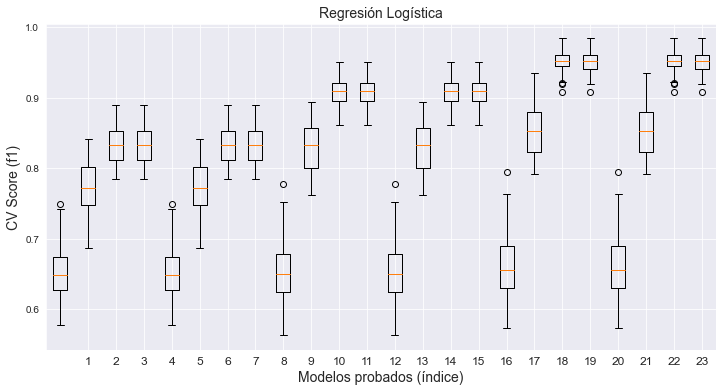


Tiempo de ejecución: 35.35740041732788 segundos


In [12]:
# 2ª etapa: boxplot para elegir el resto de paráms

# no podemos poner muchos paráms, o no veremos nada en los boxplots
# por eso aquí hay traer ya algunos paráms elegidos

import time
start_time = time.time()

pipe_fs = Pipeline([
#         ('smote_nc', smote_nc), # quitarlo si class_weight='balanced'
        ('column_transform', col_transformer),
        ('polynomial', PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)), # añadir interacciones
        ('feature_selection', SelectKBest(score_func=f_classif)), # k = número de variabs a seleccionar
        ('algorithm', grid_model.best_estimator_.named_steps['algorithm'])        
]) # importante: meter el mejor algorithm obtenido antes

parametros_fs = {
    "feature_selection__k": [3,4,5,6],
    "algorithm__C": [0.01, 0.1, 1],
    "algorithm__max_iter": [100,200]
}

# Cambiar el formato de la malla de parámetros para poder usarlos en el bucle for
grid_params = list(ParameterGrid(parametros_fs)) # lista de diccionarios

cv_scores = []
names = []
for params in grid_params:
    # Configurar los parámetros del pipeline
    pipe_fs.set_params(**params)
    
        ## set_params permite cambiar los paráms del pipe después de haber sido creado
        ## ** es desempaquetado de diccionarios
        # Es como si estuvieras pasando cada par de clave-valor del diccionario params
        # como un argumento con nombre a la función set_params.
    
    # Calcular los scores
    scores = cross_val_score(pipe_fs,
                             X_train, y_train, # X_train_resampled, y_train_resampled
                             cv=cv_technique, scoring='f1')
    
    # Identificar cada modelo
    params_str = ', '.join(f'{k}={v}' for k, v in params.items())
    
    # Guardar resultados
    cv_scores.append(scores)
    names.append(params_str)
    
# boxplot
plt.figure(figsize=(12, 6))
plt.boxplot(cv_scores)
plt.title('Regresión Logística', fontsize=14)
plt.xlabel('Modelos probados (índice)', fontsize=14)
plt.ylabel('CV Score (f1)', fontsize=14)
plt.xticks(range(2, len(cv_scores)+1), fontsize=12) # no consigo poner el xtick = 0
plt.show()

end_time = time.time()
print()
print("Tiempo de ejecución:", end_time - start_time, "segundos")

In [13]:
# Aclaración:
# Para identificar el mejor modelo, hemos ido guardando los names:
print(names[0])

# Pero en realidad no es necesario, ya están en grid_param
# (aunque no viene mal lo de names para comprobar que el código está funcionando bien)
print(grid_params[0])

algorithm__C=0.01, algorithm__max_iter=100, feature_selection__k=3
{'algorithm__C': 0.01, 'algorithm__max_iter': 100, 'feature_selection__k': 3}


In [22]:
# Como algunos son muy parecidos, veamos la diferencia

print(grid_params[10])
print(grid_params[14])
print(grid_params[18])
print(grid_params[22])

{'algorithm__C': 0.1, 'algorithm__max_iter': 100, 'feature_selection__k': 5}
{'algorithm__C': 0.1, 'algorithm__max_iter': 200, 'feature_selection__k': 5}
{'algorithm__C': 1, 'algorithm__max_iter': 100, 'feature_selection__k': 5}
{'algorithm__C': 1, 'algorithm__max_iter': 200, 'feature_selection__k': 5}


In [16]:
# OJO, el mejor modelo NO es:
# best_model = grid_model_fs.best_estimator_

# El mejor modelo es:
modelo_optimo = 18 # indicar nº óptimo

# Configura el pipeline con los parámetros deseados
selected_params = grid_params[modelo_optimo]
pipe_fs.set_params(**selected_params)

# Ajusta el modelo
selected_model = pipe_fs.fit(X_train, y_train)
selected_model

# Recuerda: al ajustar con random_state habilitado, las k variabs seleccionadas
# serán las mismas que las seleccionadas en el cross_val_score, por eso sabemos
# que esta forma de seleccionar el mejor modelo es correcta

Pipeline(steps=[('column_transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoder',
                                                  OneHotEncoder(drop=['3-9']),
                                                  ['Orbit Uncertainity '
                                                   '(categ)']),
                                                 ('scaler', RobustScaler(),
                                                  ['Est Dia in M(max)',
                                                   'Relative Velocity km per '
                                                   'sec',
                                                   'Miss Dist.(Astronomical)',
                                                   'Minimum Orbit Intersection',
                                                   'Eccentricity',
                                                   'Semi Major Axis',
                                                   'Inclination',
                                                   'Asc Node Longitude...
                                                   'Inclination_squared',
                                                   'Perihelion '
                                                   'Distance_squared',
                                                   'Mean Anomaly_raiz2',
                                                   'Mean Motion_cuarta',
                                                   'Perihelion '
                                                   'Arg_squared'])])),
                ('polynomial',
                 PolynomialFeatures(include_bias=False, interaction_only=True)),
                ('feature_selection', SelectKBest(k=5)),
                ('algorithm',
                 LogisticRegression(C=1, class_weight='balanced', penalty='l1',
                                    random_state=99, solver='liblinear'))])

In [20]:
selected_model.named_steps['algorithm'].get_params()

{'C': 1,
 'class_weight': 'balanced',
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l1',
 'random_state': 99,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [56]:
# Variables seleccionadas:

ct_names = selected_model.named_steps['column_transform'].get_feature_names_out()
poly_names = selected_model.named_steps['polynomial'].get_feature_names_out(input_features=ct_names)
select_names = selected_model.named_steps['feature_selection'].get_feature_names_out(input_features=poly_names)

print(f"Las {len(select_names)} variabs seleccionadas son:")
[i for i in select_names]

Las 5 variabs seleccionadas son:


['scaler__Minimum Orbit Intersection',
 'scaler__Est Dia in M(max)_raiz2',
 'encoder__Orbit Uncertainity (categ)_0 scaler__Minimum Orbit Intersection_log',
 'scaler__Est Dia in M(max) scaler__Minimum Orbit Intersection_log',
 'scaler__Est Dia in M(max)_raiz2 scaler__Minimum Orbit Intersection_log']

## Coeficientes del modelo

In [42]:
# Variables seleccionadas:
ct_names = selected_model.named_steps['column_transform']\
                         .get_feature_names_out()
poly_names = selected_model.named_steps['polynomial']\
                           .get_feature_names_out(input_features=ct_names)
select_names = selected_model.named_steps['feature_selection']\
                           .get_feature_names_out(input_features=poly_names)

# (recortar el nombre de las variabs, sino es muy largo)
select_names = np.array([name.replace('scaler__', '')\
                 .replace('encoder__', '') for name in select_names])

# obtener los coeficientes del modelo
coefficients = selected_model.named_steps['algorithm'].coef_[0]

# guardar en un df
coef_df = pd.DataFrame({'feature': select_names,'coefficient': coefficients})

# ordenar el DataFrame por valor absoluto de los coeficientes de mayor a menor
coef_df = coef_df.reindex(coef_df.coefficient.abs()\
                                 .sort_values(ascending=False).index)

pd.set_option('display.max_colwidth', 100)
coef_df

,feature,coefficient
3,Est Dia in M(max) Minimum Orbit Intersection_log,-66.685406
0,Minimum Orbit Intersection,-15.667096
1,Est Dia in M(max)_raiz2,7.084255
2,Orbit Uncertainity (categ)_0 Minimum Orbit Intersection_log,0.475730
4,Est Dia in M(max)_raiz2 Minimum Orbit Intersection_log,0.000000


### Punto corte (threshold)

No me voy a volver loco a probar ptos de corte, pero por cubrir un poco el tema a nivel didáctico, puedo ajustar el pto corte óptimo al menos para el mejor modelo escogido:

In [ ]:
### si quieres poner la gráfica del ROC, en la tareo de textmining está el código

In [54]:
from sklearn import metrics

# Función pto de corte por Youden
def cutoff_youden(test,pred_proba):
    # hay que meterle la % de la clase de interés (% de y=1)
    fpr, tpr, thresholds = metrics.roc_curve(test,pred_proba)
    j_scores = tpr-fpr
    j_ordered = sorted(zip(j_scores,thresholds))
    return j_ordered[-1][1]

# Calcular las %
y_pred_proba = selected_model.predict_proba(X_test)

corte = cutoff_youden(y_test,y_pred_proba[:,1]) # % de clase de interés

# transformar % en clases 0 o 1
y_pred = np.where(y_pred_proba[:, 1] > corte, 1, 0)

print("El mejor pto corte es:", corte.round(3))

El mejor pto corte es: 0.596


El valor de f1 score es: 
 0.955
Otros estadísticos del test: 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       787
           1       0.93      0.98      0.95       151

    accuracy                           0.99       938
   macro avg       0.96      0.98      0.97       938
weighted avg       0.99      0.99      0.99       938



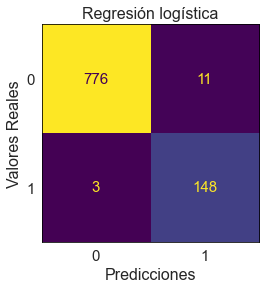

In [55]:
# Score y Confusion Matrix

# Calcular la precisión de las predicciones en el conjunto de prueba
print(f"El valor de f1 score es: \n {f1_score(y_test, y_pred).round(3)}")
print(f"Otros estadísticos del test: \n {classification_report(y_test, y_pred)}")

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

fig, ax = plt.subplots(figsize=(4, 4))
disp.plot(ax=ax, cmap='viridis', values_format='d', colorbar=False)
ax.grid(False) # Deshabilitar el grid de fondo

# plt.title('Matriz de confusión', fontsize=18) # Cambiar tamaño del título
ax.spines[['bottom','top','left','right']].set_color('black')
plt.title('Regresión logística', fontsize=16)
plt.xlabel('Predicciones', fontsize=16)
plt.ylabel('Valores Reales', fontsize=16)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
for text in ax.texts:
    text.set_fontsize(15)
plt.show()

* precision: de todos los 1's predichos, cuántos eran realmente 1?

* recall: de todos los 1's reales, cuántos hemos predicho como 1?

* f1: media armónica de precision y recall (buena métrica)

----
## Exportar datos para la comparación final de modelos

In [58]:
import pickle

# Guarda los datos de puntuaciones
with open('cv_scores_model1.pkl', 'wb') as f:
    pickle.dump(cv_scores[modelo_optimo], f)

## [Código descartado]

Estructuras/estrategias de código interesantes pero que finalmente no he necesitado utilizar

In [ ]:
# integrar SMOTE en pipeline --> de hecho, al final sí lo he probado jaja

# # Aunque puede ir bien hacer el SMOTE aparte como lo hemos hecho, para así tener tanto
# X_train como X_train_resampled y comparar resultados, también podríamos practicar a hacer
# el código integrando el SMOTE en el pipeline:

# pipe = Pipeline([
#         ('smote_nc', smote_nc),
#         ('column_transform', col_transformer),
#         ('pca', PCA(random_state=seed)),
#         ('algorithm', model)        
# ])

# # O bien, incluso podríamos ahora sí usar SMOTE normal, simplemente haciendo antes el OneHotEncoder:

## no sé si está bien ????? @@
# pipe = Pipeline([
#         ('column_transform', col_transformer),
#         ('smote', sm),
#         ('pca', PCA(random_state=seed)),
#         ('algorithm', model)        
# ])

In [ ]:
### Probar solo 1 solo GridSearch con TODO (tarda mucho computacionalmente):

# # Elegir algoritmo de predicción
# model = LogisticRegression(max_iter=300, # dfto = 100
#                            class_weight='balanced',
#                            random_state=seed)

# # Column transformer (transformaciones previas de la variabs)
# numeric_features = X_train.select_dtypes(include=[np.number]).columns.tolist()

# col_transformer = ColumnTransformer(
#     [
#     ('encoder', OneHotEncoder(drop=["3-9"]), ['Orbit Uncertainity (categ)']),
#     ('scaler', RobustScaler(), numeric_features)
#     ], remainder='passthrough')

# # Pipeline
# pipe = Pipeline([
#         ('column_transform', col_transformer),
#         ('polynomial', PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)), # añadir interacciones
#         ('feature_selection', SelectKBest(score_func=f_classif))
# #         ('pca', PCA(random_state=seed)), # parám n_components
#         ('algorithm', model)        
# ])

# # Tuneado del modelo (malla de paráms)
# parametros = {
    
#     "feature_selection__k": [8,9,10,11,12,13,14,15,16,17,18], # probar distintos números de variabs a seleccionar
# #     "pca__n_components": [8,9,10], # máx posible es k, de 'feature_selection'
#     "algorithm__penalty": ['l1','l2'], # regularización
#     "algorithm__C": [0.01, 0.1, 1], # regularización (cuanto más pequeño, más regularización)
#     "algorithm__solver": ['lbfgs'] # 'lbfgs' dfto y 'liblinear' bueno para datasets pequeños
# }

# # Repeated cross_val (stratified)
# cv_technique = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=seed)

#     # - Repeated porque el dataset es pequeño, y así mejoramos el entrenamiento
#     # - Stratified porque mantiene la proporción de clases en los folds, importante
#     #   para datos desbalanceados (los resultados mejoran ligeramente)
    
# # combinamos todo
# gsearch = GridSearchCV(estimator=pipe, cv=cv_technique, param_grid=parametros, scoring='f1') # (*)

#     # Métricas (que conozco) recomendadas para datos desbalanceados: recall, f1 y precision
#     # usamos recall porque es la que más se centra en acercar la clase minoritaria,
#     # que en nuestro caso nos parece relevante, pues nos interesa principalmente
#     # identificar correctamente los asteroides peligrosos

#     # # (*) podemos ver todos los criterios ejecutando esto:
#     # from sklearn.metrics import get_scorer_names
#     # get_scorer_names()

# # buscamos el mejor modelo (OJO, con smote --> X_resampled, y_resampled; sin smote --> X_train, y_train)

# # opción a) sin resample y con class_weight='balanced':
# grid_model = gsearch.fit(X_train, y_train)

# # opción b) con resample (SMOTE)
# # grid_model = gsearch.fit(X_train_resampled, y_train_resampled)

# # resultados
# print(grid_model.best_score_)
# print(grid_model.best_estimator_)
# print(grid_model.best_params_)

In [ ]:
# # Pipelines distintos para numéricas y categ
# # (al final no ha hecho falta porque el SelectKBest con f_classif sí sirve también para categóricas)

# # # Elegir algoritmo de predicción
# # model = LogisticRegression(max_iter=300, # dfto = 100
# #                            class_weight='balanced',
# #                            random_state=seed)

# # Identificar variabs numéricas y categ
# numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
# categ_features = ['Orbit Uncertainity (categ)']

# # Transformaciones para las variabs numéricas
# numeric_transformer = Pipeline([
#     ('scaler', RobustScaler()),
#     ('feature_selection_numeric', SelectKBest(score_func=f_classif))
# ])

# # Transformaciones para las variabs categ
# categ_transformer = Pipeline([
#     ('encoder', OneHotEncoder(drop=["3-9"])),
# #     ('feature_selection_categ', SelectKBest(score_func=chi2, k='all')) # con las categ no hace falta, solo tenemos 1
# ])

# # Combinar ambos transformers en el column transformer
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', numeric_transformer, numeric_features),
#         ('cat', categ_transformer, categ_features)
#     ], remainder='passthrough')

# # Pipeline final
# pipe = Pipeline([
#     ('preprocessor', preprocessor),
#     ('polynomial', PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)), # añadir interacciones
#     ('feature_selection', SelectKBest(score_func=f_classif)),
#     ('algorithm', model)
# ])

**Truco para la estructura de pipeline:**

Separar variabs numéricas (par las continuas) y categ (aunque sean numéricas) en dos pipelines.

Esto podría ser útil, aunque no para nuestro caso, así que no lo usaremos.

Además, tiene un inconveniente: 

1) feature selection de las numéricas

2) interacciones con las categs (ya se han descartado algunas variabs numéricas, así que muchas interacciones no se considerarán... **es lo malo**)

3) de nuevo, feature selection (incl. interacciones. Aunque puedan estar involucradas variabs categ, aquí ya están en formato numérico, así que score_func=f_classif es válido)


In [ ]:
# # Identificar variabs numéricas y categ
# numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
# categ_features = ['Orbit Uncertainity (categ)']

# # Transformaciones para las variabs numéricas
# numeric_transformer = Pipeline([
#     ('scaler', RobustScaler()),
#     ('feature_selection_numeric', SelectKBest(score_func=f_classif))
# ])

# # Transformaciones para las variabs categ
# categ_transformer = Pipeline([
#     ('encoder', OneHotEncoder(drop=["3-9"])),
# #     ('feature_selection_categ', SelectKBest(score_func=chi2, k='all')) # con las categ no hace falta, solo tenemos 1
# ])

# # Combinar ambos transformers en el column transformer
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', numeric_transformer, numeric_features),
#         ('cat', categ_transformer, categ_features)
#     ], remainder='passthrough')

# # Pipeline final
# pipe = Pipeline([
#     ('preprocessor', preprocessor),
#     ('polynomial', PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)), # añadir interacciones
#     ('feature_selection', SelectKBest(score_func=f_classif)),
#     ('algorithm', model)
# ])